<a href="https://colab.research.google.com/github/sivasrivangapandu/sivasrivangapandu/blob/main/imageRecog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install unrar if not installed
!apt-get install unrar -y
# Extract the dataset
!unrar x "/content/dogs-vs-cats.rar" "/content/dogs-vs-cats/"
# Verify extraction
!ls "/content/dogs-vs-cats/"
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define dataset directory
dataset_dir = "/content/dogs-vs-cats/"
# Define image size & batch size
IMG_SIZE = (150, 150)
BATCH_SIZE = 32
# Data augmentation for training set
train_datagen = ImageDataGenerator(
 rescale=1.0/255,
 rotation_range=20,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 validation_split=0.2 # 80% train, 20% validation
)
# Load training & validation datasets
train_generator = train_datagen.flow_from_directory(
 dataset_dir,
 target_size=IMG_SIZE,
 batch_size=BATCH_SIZE,
 class_mode='binary', # Since it's a binary classification (dogs vs cats)
 subset='training'
)
val_generator = train_datagen.flow_from_directory(
 dataset_dir,
 target_size=IMG_SIZE,
 batch_size=BATCH_SIZE,
 class_mode='binary',
 subset='validation'
)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/dogs-vs-cats.rar

Creating    /content/dogs-vs-cats/dogs-vs-cats                        OK
Creating    /content/dogs-vs-cats/dogs-vs-cats/cats                   OK
Extracting  /content/dogs-vs-cats/dogs-vs-cats/cats/240_F_97589769_t45CqXyzjz0KXwoBZT9PRaWGHRk5hQqQ.jpg       2%  OK 
Extracting  /content/dogs-vs-cats/dogs-vs-cats/cats/61d1c0e2aa741500193b2d18.jpg      10%  OK 
Extracting  /content/dogs-vs-cats/dogs-vs-cats/cats/Cat_November_2010-1a.jpg      40%  OK 
Extracting  /content/dogs-vs-cats/dogs-vs-cats/cats/download.jfif         41%  OK 
Creating    /content/dogs-vs-cats/dogs-vs-cats/dogs                   OK
Extracting  /content/dogs-vs-

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# Build the CNN Model
model = Sequential([
 Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3), strides=(1,1), padding="same"),
 MaxPooling2D((2,2), strides=(2,2)),
 Conv2D(64, (3,3), activation='relu', padding="same"),
 MaxPooling2D((2,2), strides=(2,2)),
 Conv2D(128, (3,3), activation='relu', padding="same"),
 MaxPooling2D((2,2), strides=(2,2)),
 Flatten(),
 Dense(512, activation='relu'),
 Dropout(0.5),
 Dense(1, activation='sigmoid') # Binary classification (dog or cat)
])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Model Summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      21,234,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,327,937 (81.36 MB)

 Trainable params: 21,327,937 (81.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
 train_generator,
 validation_data=val_generator,
 epochs=10
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 0.8134 - val_accuracy: 0.0000e+00 - val_loss: -19.3106
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 997ms/step - accuracy: 0.2222 - loss: -0.7085 - val_accuracy: 0.0000e+00 - val_loss: -40.3245
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 906ms/step - accuracy: 0.2222 - loss: -3.3332 - val_accuracy: 0.0000e+00 - val_loss: -76.6125
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step - accuracy: 0.2222 - loss: -2.2680 - val_accuracy: 0.0000e+00 - val_loss: -135.2133
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 941ms/step - accuracy: 0.2222 - loss: -9.9102 - val_accuracy: 0.0000e+00 - val_loss: -221.9467
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2222 - loss: -14.0912 - val_accuracy: 0.0000e+00 - val_loss: -372.9758
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2222 - loss: -19.4124 - val_accuracy: 0.0000e+00 - val_loss: -544.7864
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2222 - loss: -24.14

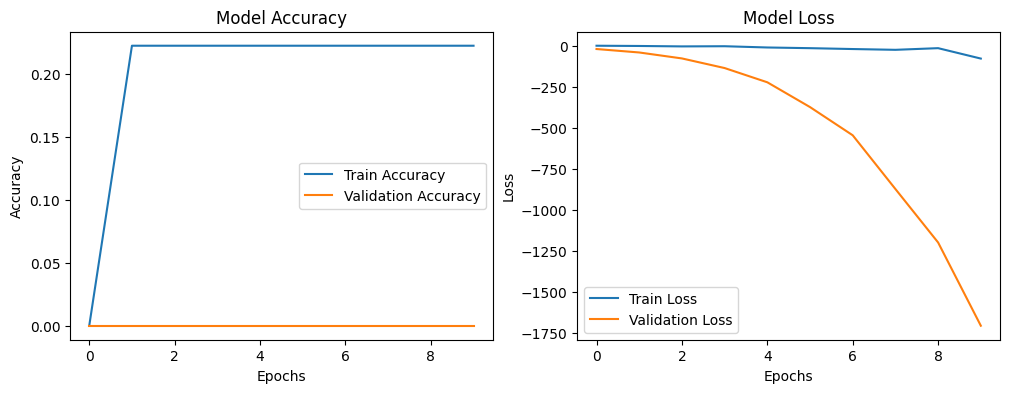

In [ ]:
import matplotlib.pyplot as plt
# Plot Accuracy & Loss
plt.figure(figsize=(12, 4))
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt # Import matplotlib.pyplot
def predict_image(img_path):
 img = image.load_img(img_path, target_size=(150, 150))
 img_array = image.img_to_array(img) / 255.0
 img_array = np.expand_dims(img_array, axis=0)
 prediction = model.predict(img_array)[0][0]
 if prediction > 0.5:
  label = "Dog" # Define label
  confidence = prediction # Define confidence
  print(f"The image is a Dog ({prediction:.2f})")



 else:
  label = "Cat" # Define label
  confidence = 1 - prediction # Define confidence
  print(f"The image is a Cat ({1 - prediction:.2f})")



 # Display the image, indented correctly
 plt.imshow(image.load_img(img_path))
 plt.axis("off")
 plt.title(f"Prediction: {label} ({confidence:.2f})")
 plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
The image is a Dog (1.00)


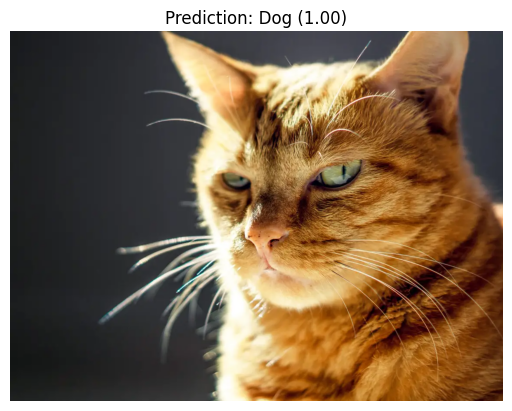

In [ ]:

predict_image("/content/61d1c0e2aa741500193b2d18.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
The image is a Dog (1.00)


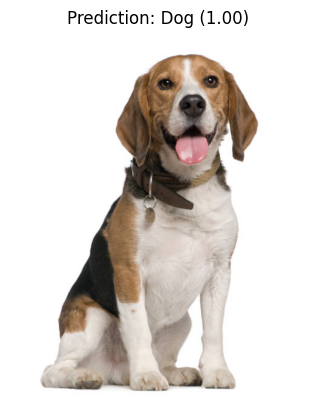

In [ ]:
predict_image("/content/istockphoto-962855368-612x612.jpg")

# New Section